<a href="https://colab.research.google.com/github/chinmayeeb96/Machine-learning-for-Particle-Identification/blob/main/MicroBooNE_Particle_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MicroBooNE Particle Identification Dataset
###  

*   The dataset has been taken from [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification)
*   It has been taken from the MiniBooNE experiment conducted in the fermilab.
*   A stream of muon neutrinos are fired and the detector measures the precense of electron neutrinos(signal) among the muon neutrinos(noise).
*  There are 50 features in the dataset related to every detection made , however no information is given about the features.
*  There are no missing values.
*  The first line in the file *MiniBooNE_PID.txt* contains 2 space seperated values , the signal events come first, followed by the background events.
*  This is a binary classification problem where we want to tell wether a given signal is a electron neutrino or not.











In [ ]:
! wget -O data.txt -nc --no-check-certificate  https://archive.ics.uci.edu/ml/machine-learning-databases/00199/MiniBooNE_PID.txt


--2022-02-18 07:47:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00199/MiniBooNE_PID.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91174877 (87M) [application/x-httpd-php]
Saving to: ‘data.txt’

data.txt            100%[===================>]  86.95M  35.0MB/s    in 2.5s    

2022-02-18 07:47:48 (35.0 MB/s) - ‘data.txt’ saved [91174877/91174877]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('data.txt',sep = ' ',header = None, skiprows=1, skipinitialspace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.8850,0.928671,0.140918,2.58663,1689.070,1.197950,19.3561,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.22299,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.7180,0.882784,0.368855,2.24638,1388.260,0.839230,6.6951,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.31717,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.3960,0.412250,0.434002,2.38485,992.098,0.514175,16.0030,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.18765,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.8656,0.833067,0.181294,2.49837,1289.160,0.630307,12.9374,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.70034,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.6680,0.398421,0.353034,2.04136,949.231,0.389585,13.9175,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.68793,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [ ]:
# feature scaling

f = open("data.txt",'r')
line = f.readline()
f.close()
l = line.split()
Y = int(l[0])*[1] + int(l[1])*[0]
y = np.array(Y)
x = np.array(df)
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [ ]:

from sklearn import metrics


def evaluate(y_test, y_pred, y_pred_proba):   
    
    print('Model name: ', model_name) 
    print('The confusion matrix for the given model is: ', metrics.confusion_matrix(y_test,y_pred))  
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
    print('Precision: ', metrics.precision_score(y_test, y_pred))
    print('Recall: ', metrics.recall_score(y_test, y_pred))
    print('F1-Score: ', metrics.f1_score(y_test, y_pred))   
    print('AUC score: ', metrics.roc_auc_score(y_test, y_pred_proba))   
     
    metrics.RocCurveDisplay.from_estimator(clf, x_test, y_test)
     

The score for this model is:  0.8901463894697995
the best value of parameters is:  {'n_neighbors': 14}
Model name:  KNN
The confusion matrix for the given model is:  [[21821  1631]
 [ 1941  7123]]
Accuracy:  0.8901463894697995
Precision:  0.8136851724925748
Recall:  0.785856134157105
F1-Score:  0.7995285666180266
AUC score:  0.946438211326916
CPU times: user 18min 55s, sys: 50.3 s, total: 19min 45s
Wall time: 16min 6s


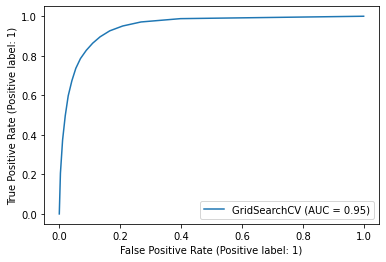

In [ ]:
%%time 
from sklearn.neighbors import KNeighborsClassifier



# define the model
model_name = "KNN"
knn=KNeighborsClassifier()
parameters_knn={'n_neighbors':[1,5,10,14]}
clf=GridSearchCV(knn,parameters_knn).fit(x_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(x_test,y_test))
print('the best value of parameters is: ',clf.best_params_)

y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

The score for this model is:  0.908660351826793
the best value of parameters is:  {'max_depth': 10}
Model name:  Decision Tree
The confusion matrix for the given model is:  [[21901  1551]
 [ 1419  7645]]
Accuracy:  0.908660351826793
Precision:  0.8313397129186603
Recall:  0.8434466019417476
F1-Score:  0.8373493975903614
AUC score:  0.9466071706397279
CPU times: user 1min 14s, sys: 74.6 ms, total: 1min 14s
Wall time: 1min 14s


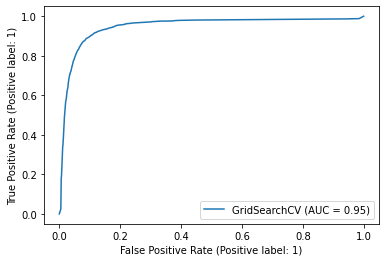

In [ ]:
%%time 
from sklearn.tree import DecisionTreeClassifier


# define the model
model_name = "Decision Tree"
dt=DecisionTreeClassifier()
parameters_dt={'max_depth':[5,10,15]}
clf=GridSearchCV(dt,parameters_dt).fit(x_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(x_test,y_test))
print('the best value of parameters is: ',clf.best_params_)

y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

The score for this model is:  0.8728318366342723
the best value of parameters is:  {'C': 100}
Model name:  Logistic Regression
The confusion matrix for the given model is:  [[22184  1268]
 [ 2867  6197]]
Accuracy:  0.8728318366342723
Precision:  0.8301406563965171
Recall:  0.683693733451015
F1-Score:  0.7498336257486842
AUC score:  0.9298375419195791
CPU times: user 4min 14s, sys: 1min 24s, total: 5min 38s
Wall time: 2min 51s


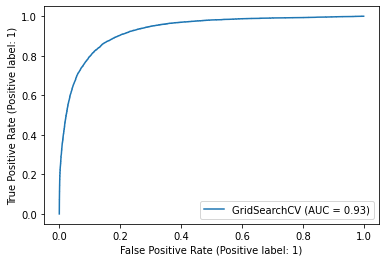

In [ ]:
%%time 
from sklearn.linear_model import LogisticRegression

# define the model
model_name = "Logistic Regression"
lr=LogisticRegression(random_state=0,max_iter=5000)
C_range={'C':[100]}
clf=GridSearchCV(lr,C_range).fit(x_train,y_train)


# print model scores
print('The score for this model is: ',clf.score(x_test,y_test))
print('the best value of parameters is: ',clf.best_params_)

y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

The score for this model is:  0.9240066428835035
the best value of parameters is:  {'max_depth': 10, 'max_samples': 40000, 'n_estimators': 100}
Model name:  Random Forest
The confusion matrix for the given model is:  [[22336  1116]
 [ 1355  7709]]
Accuracy:  0.9240066428835035
Precision:  0.8735410764872521
Recall:  0.8505075022065314
F1-Score:  0.8618704231650736
AUC score:  0.9752737450884638
CPU times: user 10min 47s, sys: 1.42 s, total: 10min 48s
Wall time: 10min 48s


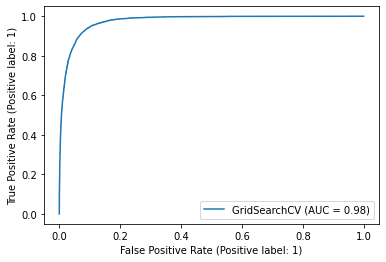

In [ ]:
%%time 
from sklearn.ensemble import RandomForestClassifier

# define the model
model_name = "Random Forest"
rf=RandomForestClassifier(bootstrap=True)
parameters_rf={'n_estimators':[10,50,100],'max_depth':[5,10],'max_samples':[30000,40000]}
clf=GridSearchCV(rf,parameters_rf).fit(x_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(x_test,y_test))
print('the best value of parameters is: ',clf.best_params_)

y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)


## Conclusion

We found the Random Forest classification technique to be the best classification technique with highest ROC value.